<a href="https://colab.research.google.com/github/ferdmartin/MachineLearningHws/blob/main/TimeSeries/MLHw2_Time_Series_Analysis_FML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Homework II

**Name:** Fernando E. Martinez Lopez

**Student ID:** A19737173

In [1]:
import pandas as pd
import prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose as sdeco
import plotly
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ferdmartin/MachineLearningHws/main/TimeSeries/GoldSilver.csv')
df.rename({'Unnamed: 0':'date'},axis=1, inplace=True)
df = df[['date', 'gold']]
df.date = pd.to_datetime(df.date, infer_datetime_format=True)
df.index = df.date; df.drop("date",axis=1, inplace=True)

In [4]:
plot_size = (20,6)

# 1. plot the time series and plot the decomposition (trend/seasonality/remainder) and plot the ACF and PACF of the time series

## a. Seasonal Decomposition

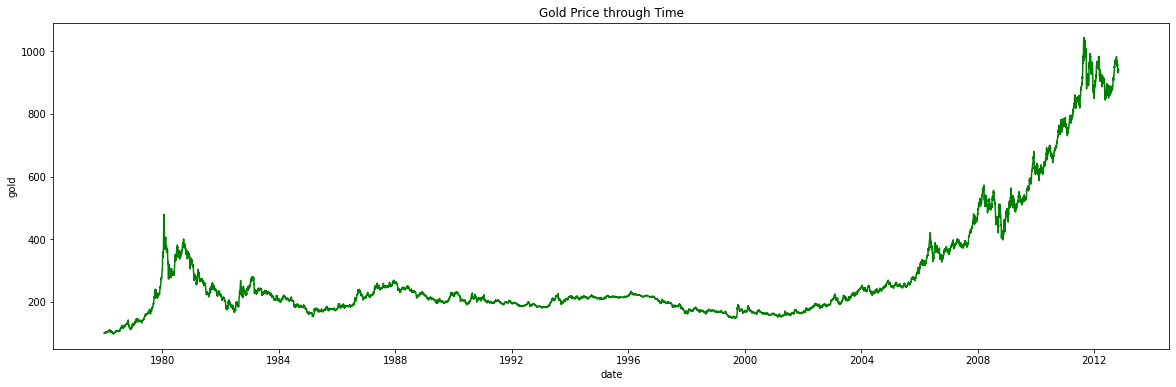

In [5]:
# Plot Data
plt.figure(figsize=plot_size)
sns.lineplot(data=df, x="date", y="gold", color="green")
plt.title("Gold Price through Time");

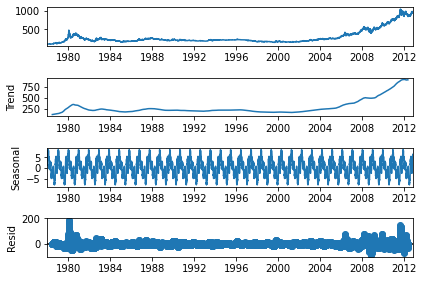

In [6]:
# Additive Seasonal Decomposition
AvgDaysByYear = round(df.index.map(lambda x: x.year).value_counts().mean()) # Avg. Num of days by year
seasonal_decomposition_additive = sdeco(df, model='additive', period=AvgDaysByYear)
seasonal_decomposition_additive.plot();

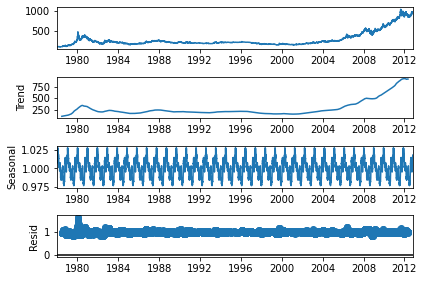

In [7]:
# Multiplicative Seasonal Decomposition
seasonal_decomposition_multiplicative = sdeco(df, model='multiplicative', period=AvgDaysByYear)
seasonal_decomposition_multiplicative.plot();

## b. ACF and PACF Plots of the time series

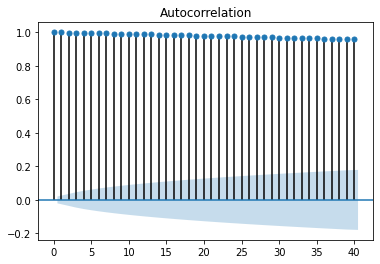

In [8]:
plot_acf(x=df);

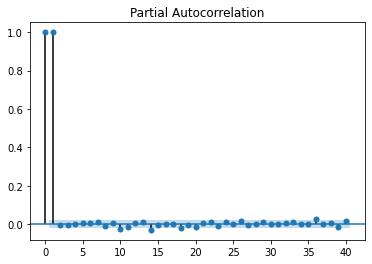

In [9]:
plot_pacf(df);

# 2. Use different algorithms to train a model (Train.csv) on the meantemp, plot the actual data vs your forecast (Test.csv)
* Facebook Prophet
* ARIMA or SARIMA
* Holt Winter's

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Facebook Prophet

In [12]:
from prophet import Prophet
dfGoldTrain = df.reset_index().rename({"date": "ds", "gold":"y"},axis=1)
dfGoldTest = pd.read_csv("https://raw.githubusercontent.com/ferdmartin/MachineLearningHws/main/TimeSeries/GoldSilverTest.csv", header=None); dfGoldTest.columns = ["ds", "y", "silver"]
dfGoldTest.drop("silver", axis=1, inplace=True)
dfGoldTest.ds = pd.to_datetime(dfGoldTest.ds, infer_datetime_format=True)
#dfGoldTest.index = dfGoldTest.date; dfGoldTest.drop("date",axis=1, inplace=True)

In [13]:
dfGoldTest.tail()

,ds,y
38,2012-12-25,906.96
39,2012-12-26,907.61
40,2012-12-27,909.26
41,2012-12-28,905.00
42,2012-12-31,915.88


In [14]:
model = Prophet()
model.fit(dfGoldTrain)
future = model.make_future_dataframe(periods=61)
predictions = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpny10mear/fjys_cyy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpny10mear/4jp5_223.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3389', 'data', 'file=/tmp/tmpny10mear/fjys_cyy.json', 'init=/tmp/tmpny10mear/4jp5_223.json', 'output', 'file=/tmp/tmpny10mear/prophet_model4dwrq4k7/prophet_model-20221106210301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:03:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:03:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


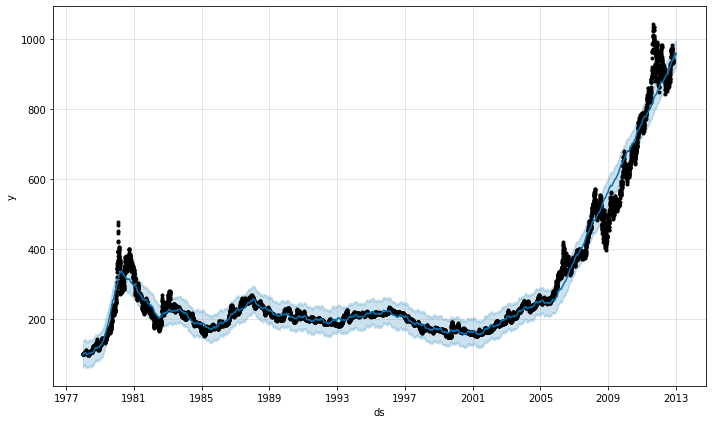

In [15]:
model.plot(predictions);

In [16]:
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9145,2012-12-27,956.050928,919.682741,994.756302,956.050928,956.050928,0.310151,0.310151,0.310151,-0.726219,-0.726219,-0.726219,1.036369,1.036369,1.036369,0.0,0.0,0.0,956.361078
9146,2012-12-28,956.320944,916.437676,991.045910,956.320944,956.320944,0.704579,0.704579,0.704579,-0.532345,-0.532345,-0.532345,1.236924,1.236924,1.236924,0.0,0.0,0.0,957.025523
9147,2012-12-29,956.590959,923.240732,996.788563,956.590959,956.590959,3.084005,3.084005,3.084005,1.619336,1.619336,1.619336,1.464669,1.464669,1.464669,0.0,0.0,0.0,959.674964
9148,2012-12-30,956.860975,925.117642,997.379056,956.860975,956.860975,3.335943,3.335943,3.335943,1.619337,1.619337,1.619337,1.716605,1.716605,1.716605,0.0,0.0,0.0,960.196918
9149,2012-12-31,957.130991,922.319053,996.894007,957.130991,957.130991,1.286138,1.286138,1.286138,-0.703151,-0.703151,-0.703151,1.989289,1.989289,1.989289,0.0,0.0,0.0,958.417129


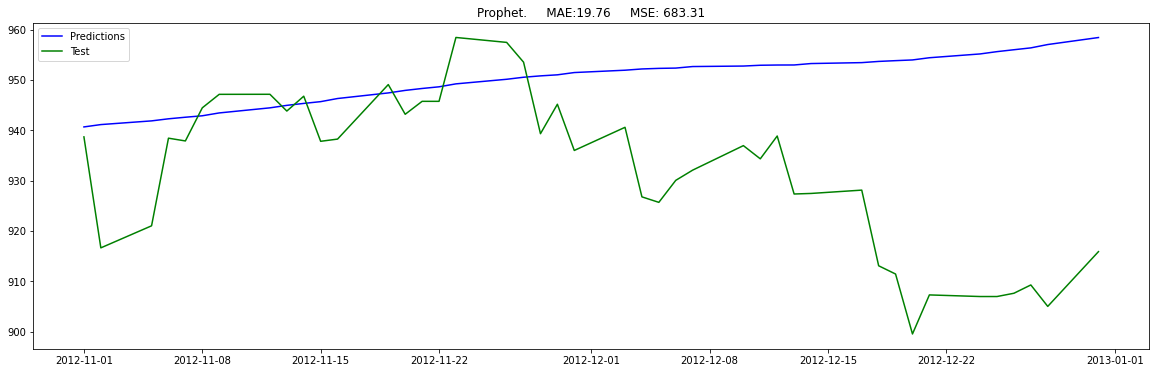

In [17]:
plt.figure(figsize=plot_size)
preds_to_plot = predictions[predictions.ds.isin(dfGoldTest.ds.values)][["ds", "yhat"]]

MAE = mean_absolute_error(dfGoldTest.y.values, preds_to_plot.yhat)
MSE = mean_squared_error(dfGoldTest.y.values, preds_to_plot.yhat)

plt.plot(preds_to_plot.ds, preds_to_plot.yhat, label="Predictions", color="blue")
plt.plot(dfGoldTest.ds, dfGoldTest.y, label="Test", color="green")
plt.legend()
plt.title(f"Prophet.     MAE:{round(MAE,2)}     MSE: {round(MSE,2)}");

## ARIMA

In [18]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(dfGoldTrain.set_index("ds"), order=(1,1,1))
arima = arima.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B will be use

In [19]:
arima_forecast, _, conf_interval = arima.forecast(len(dfGoldTest))

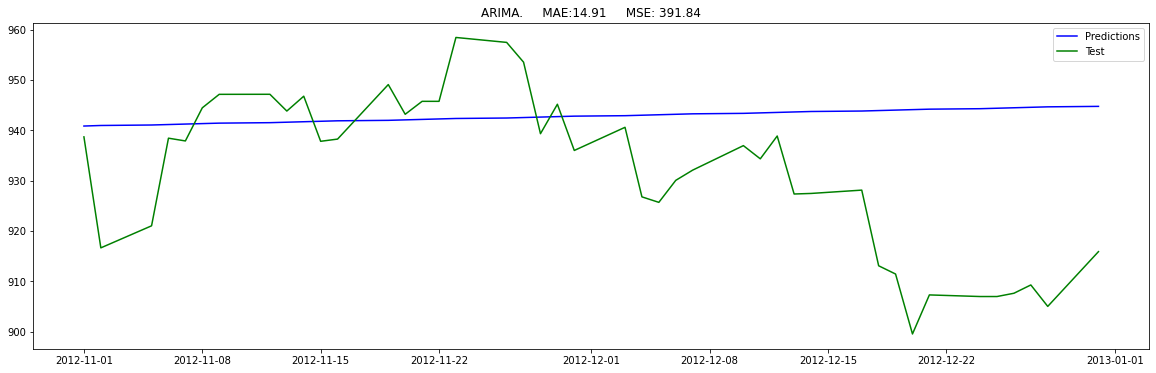

In [20]:
plt.figure(figsize=plot_size)
preds_to_plot = predictions[predictions.ds.isin(dfGoldTest.ds.values)][["ds", "yhat"]]

MAE = mean_absolute_error(dfGoldTest.y.values, arima_forecast)
MSE = mean_squared_error(dfGoldTest.y.values, arima_forecast)

plt.plot(dfGoldTest.ds, arima_forecast, label="Predictions", color="blue")
plt.plot(dfGoldTest.ds, dfGoldTest.y, label="Test", color="green")
plt.legend()
plt.title(f"ARIMA.     MAE:{round(MAE,2)}     MSE: {round(MSE,2)}");

## Holt Winter's

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
HoltWinter = ExponentialSmoothing(dfGoldTrain.set_index("ds"),trend='additive',seasonal='additive').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


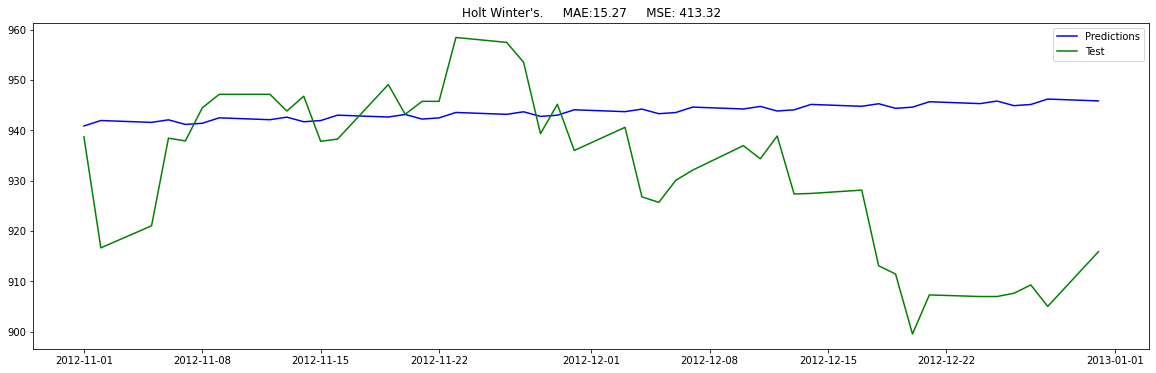

In [22]:
HoltWinter_forecast = HoltWinter.forecast(43)
plt.figure(figsize=plot_size)
MAE = mean_absolute_error(dfGoldTest.y.values, HoltWinter_forecast)
MSE = mean_squared_error(dfGoldTest.y.values, HoltWinter_forecast)

plt.plot(dfGoldTest.ds, HoltWinter_forecast, label="Predictions", color="blue")
plt.plot(dfGoldTest.ds, dfGoldTest.y, label="Test", color="green")
plt.legend()
plt.title(f"Holt Winter's.     MAE:{round(MAE,2)}     MSE: {round(MSE,2)}");

# 3. Implement classic decomposition by your own and plot the decomposition (trend/seasonality/remainder)

In [29]:
import numpy as np

In [24]:
class seasonal_decomposition_implementation:
  def __init__(self, input_array, period:int):
    import numpy as np
    from statsmodels.tsa.filters.filtertools import convolution_filter
    self.input_array = input_array
    self.period = period
    #Trend
    filtr = np.repeat(1./self.period, self.period)
    trend = convolution_filter(self.input_array, filtr, 1) # weighted trend
    detrended_ds = self.input_array - trend
    # Seasonal
    seasonal_mean = [np.mean(detrended_ds[starting_time::self.period], axis=0) for starting_time in range(self.period)]
    seasonal_mean /= np.mean(seasonal_mean)
    seasonal = np.tile(seasonal_mean.T, len(self.input_array) // self.period + 1).T[:len(self.input_array)]
    # Remainder
    remainder = detrended_ds - seasonal
    self.seasonal_decomp_ds = pd.DataFrame({"Observed": np.squeeze(self.input_array.values), "Trend": np.squeeze(trend.values), "Seasonal": np.squeeze(seasonal), "Remainder": np.squeeze(remainder.values)}, index=trend.index)
    self.seasonal_decomp_ds.dropna(inplace=True)
  
  def show(self):
    return self.seasonal_decomp_ds
  
  def plot(self, figsize=(15,8), color="green"):
    fig = plt.figure(figsize=figsize)
    for i, col in enumerate(self.seasonal_decomp_ds.columns):
      plt.subplot(4, 1, i+1)
      plt.plot(self.seasonal_decomp_ds[col], label=col, color=color)
      plt.legend()
    plt.suptitle("Seasonal Decomposition Implementation", fontsize=18);

In [28]:
seasonal_decomp_impl = seasonal_decomposition_implementation(df, 260)
seasonal_decomp_impl.show()

,Observed,Trend,Seasonal,Remainder
date,,,,
1978-12-28,129.01,112.467462,1.200368,15.342170
1978-12-29,131.28,112.587769,1.316667,17.375564
1979-01-01,131.28,112.708077,1.370082,17.201841
1979-01-02,128.61,112.818115,1.392460,14.399425
1979-01-03,128.01,112.925846,1.449786,13.634368
...,...,...,...,...
2012-10-25,937.29,916.060769,1.146878,20.082353
2012-10-26,936.69,915.955385,1.166418,19.568197
2012-10-29,934.94,915.889962,1.172325,17.877714


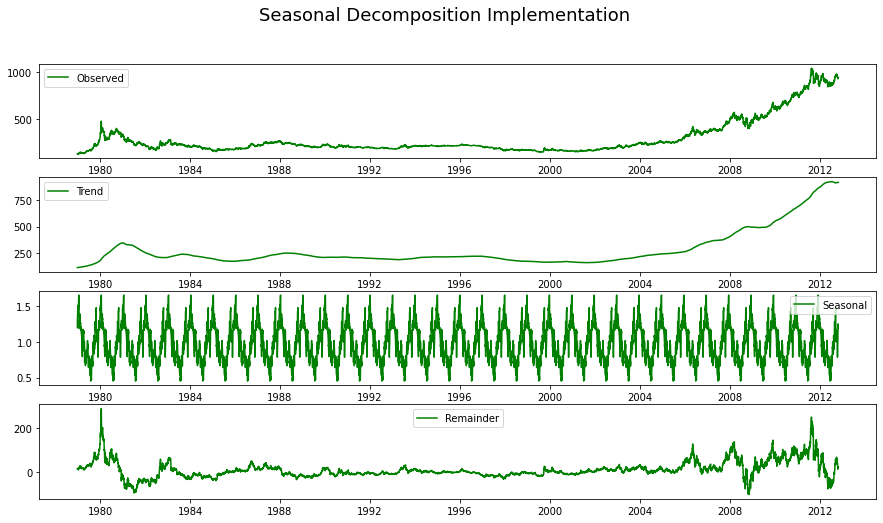

In [27]:
seasonal_decomp_impl.plot()